In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# import dataset
data = pd.read_table('smsdata.txt', header = None)

# rename the column header
data.columns = ["label", "message"]
data.head()

,label,message
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# converting labels to numeric labels
# good = 0 and spam = 1
data['label_num']=data.label.map({'good':0,'spam':1})
data.head()

,label,message,label_num
0,good,"Go until jurong point, crazy.. Available only ...",0
1,good,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,good,U dun say so early hor... U c already then say...,0
4,good,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
data.describe()

,label_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
# calculating the length of all the messages
data['char_count']=data['message'].apply(len)
data['word_count'] = data['message'].apply(lambda x: len([w for w in x.split(' ')]))

In [6]:
from string import punctuation
punctuations = " ".join(punctuation)
print(punctuations)
data['punctuation_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y in punctuations]))

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~


In [7]:
data['digit_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y.isdigit()]))

In [8]:
data['upperchar_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y.isupper()]))

In [9]:
data.head()

,label,message,label_num,char_count,word_count,punctuation_count,digit_count,upperchar_count
0,good,"Go until jurong point, crazy.. Available only ...",0,111,20,9,0,3
1,good,Ok lar... Joking wif u oni...,0,29,6,6,0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,6,25,10
3,good,U dun say so early hor... U c already then say...,0,49,11,6,0,2
4,good,"Nah I don't think he goes to usf, he lives aro...",0,61,13,2,0,2


In [10]:
# Extract Response and Predictors
y = pd.DataFrame(data["label_num"])
X = pd.DataFrame(data[["char_count", "word_count", "punctuation_count", "digit_count", "upperchar_count"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4179, 1) (4179, 5)
Test Set  : (1393, 1) (1393, 5)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9954534577650156

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9748743718592965



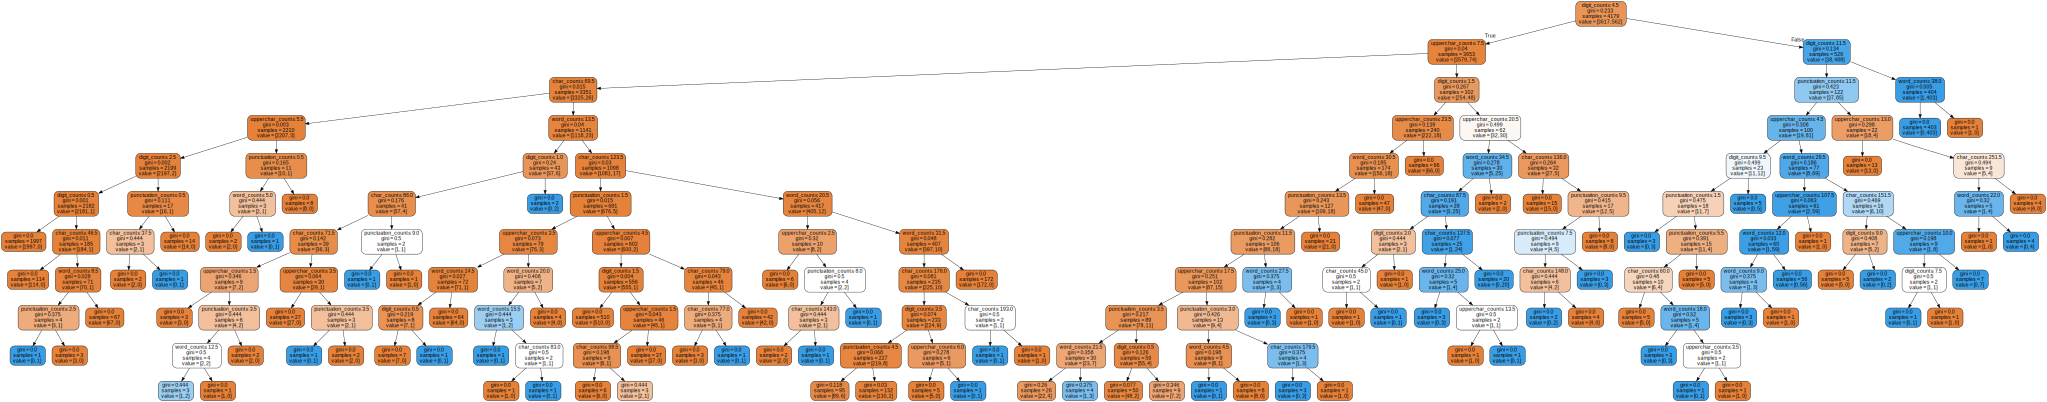

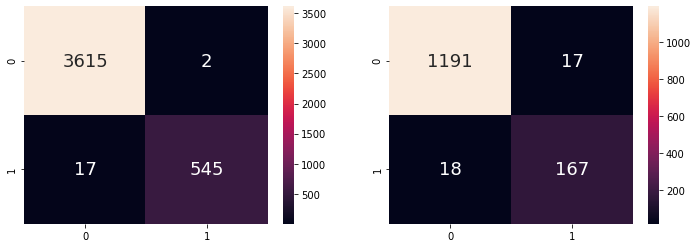

In [11]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)